In [24]:
import os 
import json 

def load_json_data(json_file):
    """加载JSON数据"""
    try:
        with open(json_file, 'r', encoding='utf-8') as f:
            return json.load(f)
    except Exception as e:
        print(f"加载JSON文件时出错: {e}")
        return {}

json_file="/data/home/libo/work/DataFactory/results/4o_pk_o4_mini_1_stage_merge/component_consistency_results.json"
json_data = load_json_data(json_file)
    

In [25]:
all_data = []
for image_name, data in json_data.items():
    component_details=data["component_details"]
    components = data["components"]
    for component_name, component_data in component_details.items():
        eval_result = component_data["eval_result"]
        try:
            better_model = eval_result.get("right_model", "none")
            score_details= eval_result["score_details"]
            consistency_score= eval_result["consistency_score"]
            all_data.append([image_name,len(components),component_name,better_model,consistency_score,score_details])
        except Exception as e:
            print(f"处理组件 {component_name} 时出错: {e}:{eval_result}")
            continue
all_data[0:5]

处理组件 N2 bit counter 时出错: 'NoneType' object has no attribute 'get':None
处理组件 TDL_f 时出错: 'NoneType' object has no attribute 'get':None
处理组件 SC doubler 时出错: 'NoneType' object has no attribute 'get':None
处理组件 Transient Accelerator 时出错: 'NoneType' object has no attribute 'get':None
处理组件 C1RP 时出错: 'NoneType' object has no attribute 'get':None
处理组件 RF hybrid 时出错: 'NoneType' object has no attribute 'get':None


[['block_circuit_train_15k_0321_003773.jpg',
  6,
  'PFD/CP',
  'none',
  100,
  [3, 3, 3, 100]],
 ['block_circuit_train_15k_0321_003773.jpg',
  6,
  'OFF-CHIP LF',
  'none',
  100,
  [2, 2, 2, 100]],
 ['block_circuit_train_15k_0321_003773.jpg', 6, 'VCO', 'none', 50, []],
 ['block_circuit_train_15k_0321_003773.jpg',
  6,
  'PROGRAMMABLE M EVEN DIVIDER',
  'none',
  100,
  [3, 3, 3, 100]],
 ['block_circuit_train_15k_0321_003773.jpg',
  6,
  'PROGRAMMABLE N DIVIDER',
  'none',
  50,
  []]]

In [31]:
for i in range(len(all_data)):
    print(all_data[i])

['block_circuit_train_15k_0321_003773.jpg', 6, 'PFD/CP', 'none', 100, [3, 3, 3, 100]]
['block_circuit_train_15k_0321_003773.jpg', 6, 'OFF-CHIP LF', 'none', 100, [2, 2, 2, 100]]
['block_circuit_train_15k_0321_003773.jpg', 6, 'VCO', 'none', 50, []]
['block_circuit_train_15k_0321_003773.jpg', 6, 'PROGRAMMABLE M EVEN DIVIDER', 'none', 100, [3, 3, 3, 100]]
['block_circuit_train_15k_0321_003773.jpg', 6, 'PROGRAMMABLE N DIVIDER', 'none', 50, []]
['block_circuit_train_15k_0321_003773.jpg', 6, '3rd ORDER MASH DEMODULATOR', 'none', 75, [2, 3, 2, 80]]
['block_circuit_train_15k_0321_001050.jpg', 7, 'In', 'none', 50, [1, 1, 1, 100]]
['block_circuit_train_15k_0321_001050.jpg', 7, 'Static logic', 'none', 80, [2, 2, 3, 80]]
['block_circuit_train_15k_0321_001050.jpg', 7, 'CLKA', 'none', 50, [1, 2, 0, 100]]
['block_circuit_train_15k_0321_001050.jpg', 7, 'M1', 'none', 75, [2, 2, 3, 80]]
['block_circuit_train_15k_0321_001050.jpg', 7, 'Out', 'none', 60, [1, 1, 2, 66.67]]
['block_circuit_train_15k_0321_0010

In [26]:
import pandas as pd
df = pd.DataFrame(all_data, columns=['image_name', 'component_count', 'component_name', 'better_model', 'consistency_score', 'score_details'])
df.to_csv('../.cache/component_consistency_results.csv', index=False)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11513 entries, 0 to 11512
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   image_name         11513 non-null  object 
 1   component_count    11513 non-null  int64  
 2   component_name     11513 non-null  object 
 3   better_model       11513 non-null  object 
 4   consistency_score  11513 non-null  float64
 5   score_details      11513 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 539.8+ KB


<Axes: >

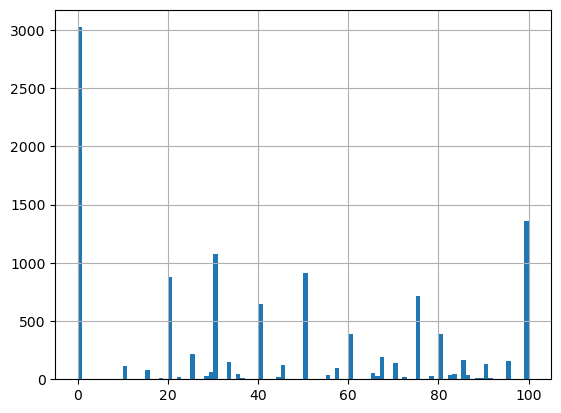

In [28]:
df.consistency_score.hist(bins=100)

In [13]:
# 计算>95分的占比
P95= df[df.consistency_score > 95].shape[0] / df.shape[0]
# 计算>90分的占比
P90= df[df.consistency_score > 90].shape[0] / df.shape[0]
# 计算>85分的占比
P85= df[df.consistency_score > 85].shape[0] / df.shape[0]
# 计算>80分的占比
P80= df[df.consistency_score > 80].shape[0] / df.shape[0]


print( P95
      ,P90
      ,P85
      ,P80)


0.11986434108527132 0.13439922480620156 0.15106589147286822 0.17344961240310078


<Axes: >

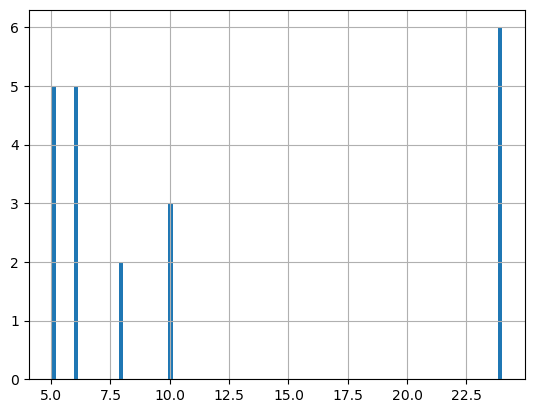

In [32]:
df[df.consistency_score > 95].component_count.hist(bins=100)

In [30]:
len(df[df.consistency_score >= 80])

2367